# 1. Import Libraries and data set

# 2. Data Cleaning Check

## Checking for Extreme Outliers

# 3. Preparing for regressive analysis

## Exploring variables for regressive Analysis

# 4. Regression analysis

## GDP Per capita and happiness score

### Creating a testing training set for GDP per Capita

### Testing Set

### Comparing to training set

### Testing performance improvement after removing outliers

# 5.Export Data

--------

# 1. Import Libraries and data set

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Unclutter display.
pd.set_option('display.max_columns',15)

In [3]:
# setting automatic graph display
%matplotlib inline

In [4]:
#Creating Pathway for data
path =(r'C:\Users\colmu\Desktop\Documents\GitHub Documents\CF_WHR')

In [5]:
#Importing dataset WHR_GDP_2015to2019
df =pd.read_csv(os.path.join(path,'data','Prepared Data','WHR_GDP_2015to2019.csv'))
df

,year,Country,region,happiness_rank,happiness_score,perceptions_of_economy,social_support,healthy_life_expectancy,perceptions_of_freedom,perceptions_of_generosity,perceptions_of_corruption,GDP,GDP_per_capita,GDP_per_capita_annual_ growth
0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,6.940000e+11,83806.447600,0.494130
1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,1.751721e+10,52951.681510,3.354145
2,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,3.030000e+11,53254.856370,1.622166
3,2015,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,3.880000e+11,74809.965800,0.444639
4,2015,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,1.560000e+12,43596.135540,-0.089286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2019,Rwanda,Sub-Saharan Africa,152,3.334,0.35900,0.71100,0.61400,0.55500,0.21700,0.41100,1.034633e+10,806.100820,3.365467
778,2019,United Republic of Tanzania,Sub-Saharan Africa,153,3.231,0.47600,0.88500,0.49900,0.41700,0.27600,0.14700,6.102673e+10,1050.931763,2.667817
779,2019,Afghanistan,Southern Asia,154,3.203,0.35000,0.51700,0.36100,0.00000,0.15800,0.02500,1.879944e+10,497.741429,0.932833
780,2019,Central African Republic,Sub-Saharan Africa,155,3.083,0.02600,0.00000,0.10500,0.22500,0.23500,0.03500,2.221301e+09,426.408753,0.833010


# 2. Data Cleaning Check

In [6]:
# Checking Column Names
df.columns

Index(['year', 'Country', 'region', 'happiness_rank', 'happiness_score',
       'perceptions_of_economy', 'social_support', 'healthy_life_expectancy',
       'perceptions_of_freedom', 'perceptions_of_generosity',
       'perceptions_of_corruption', 'GDP', 'GDP_per_capita',
       'GDP_per_capita_annual_ growth'],
      dtype='object')

In [7]:
df.shape

(782, 14)

In [8]:
#Checking for missing values

df.isnull().sum()

# No missing values to handle

year                             0
Country                          0
region                           0
happiness_rank                   0
happiness_score                  0
perceptions_of_economy           0
social_support                   0
healthy_life_expectancy          0
perceptions_of_freedom           0
perceptions_of_generosity        0
perceptions_of_corruption        0
GDP                              0
GDP_per_capita                   0
GDP_per_capita_annual_ growth    0
dtype: int64

In [9]:
#Duplicates Check by creating subset

dups = df.duplicated()

In [10]:
#checking subset for duplicates
dups.shape # No dups

(782,)

## Checking for Extreme Outliers

<Axes: xlabel='GDP_per_capita', ylabel='Count'>

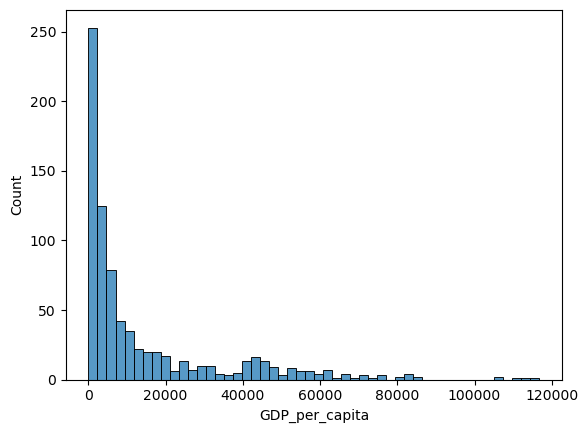

In [11]:
# Looking for extreme values
sns.histplot(df['GDP_per_capita'], bins=50)

Data shows a wide range of values for GDP_per_capita. Data distribution idicates the prescence of multiple outliers which have been previously identifies in prior scripts. Values above 80,000 GDP per person stand out as extreme outliers in this dataset.

In [12]:
#Checking Descriptive statistics for GDP_per_capita
df['GDP_per_capita'].describe()

count       782.000000
mean      14218.076740
std       19983.782684
min           0.000000
25%        1516.426988
50%        5280.404914
75%       17768.572990
max      116786.511700
Name: GDP_per_capita, dtype: float64

In [13]:
df['GDP_per_capita'].median() # Check the median

5280.404914000001

# 3. Preparing for regressive analysis

## Exploring variables for regressive Analysis

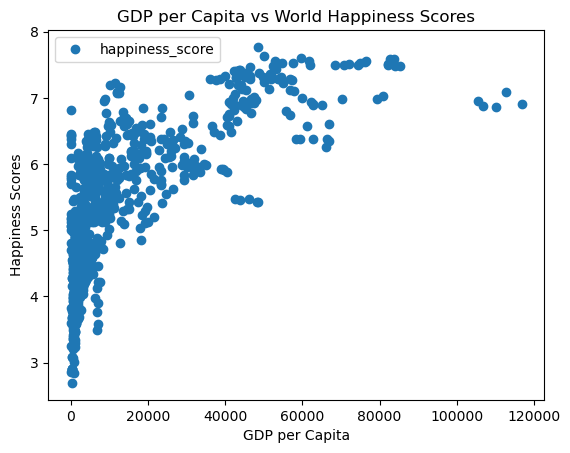

In [14]:
# Creating a scatterplot to analzed GDP_per_capita to happiness_scores

df.plot(x = 'GDP_per_capita', y='happiness_score',style='o') 

matplotlib.pyplot.title('GDP per Capita vs World Happiness Scores')  
matplotlib.pyplot.xlabel('GDP per Capita')  
matplotlib.pyplot.ylabel('Happiness Scores')  
matplotlib.pyplot.show()

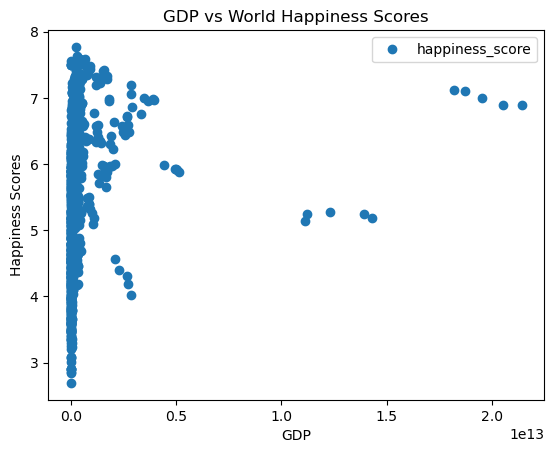

In [15]:
# Creating a scatterplot to analzed GDP to happiness_scores

df.plot(x = 'GDP', y='happiness_score',style='o') 

matplotlib.pyplot.title('GDP vs World Happiness Scores')  
matplotlib.pyplot.xlabel('GDP')  
matplotlib.pyplot.ylabel('Happiness Scores')  
matplotlib.pyplot.show()

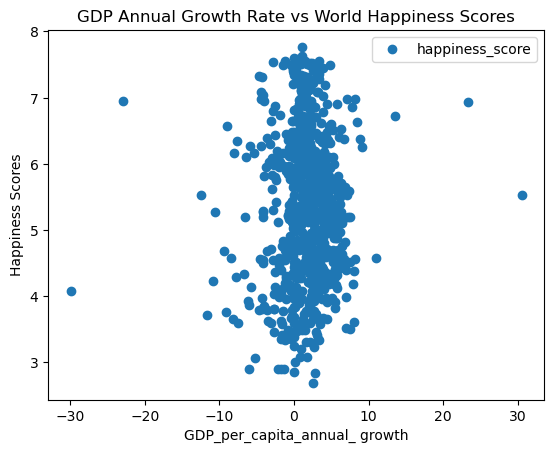

In [16]:
# Creating a scatterplot to analzed GDP_annual growth to happiness_scores

df.plot(x = 'GDP_per_capita_annual_ growth', y='happiness_score',style='o') 

matplotlib.pyplot.title('GDP Annual Growth Rate vs World Happiness Scores')  
matplotlib.pyplot.xlabel('GDP_per_capita_annual_ growth')  
matplotlib.pyplot.ylabel('Happiness Scores')  
matplotlib.pyplot.show()

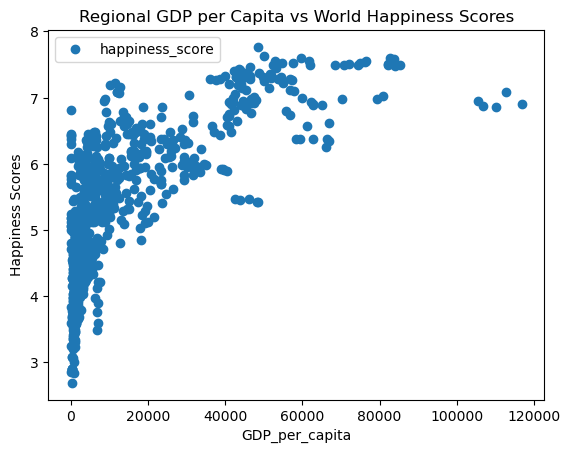

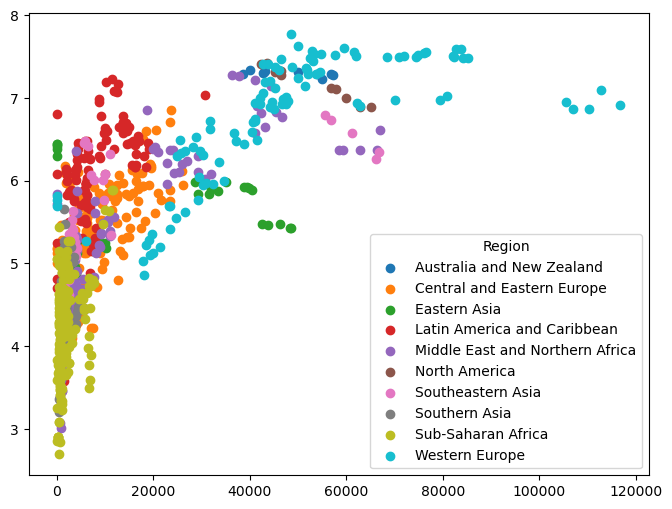

In [17]:
# Creating a scatterplot to analyze regional gdp_per_capita and happiness score

df.plot(x = 'GDP_per_capita', y='happiness_score',style='o') 

matplotlib.pyplot.title('Regional GDP per Capita vs World Happiness Scores')  
matplotlib.pyplot.xlabel('GDP_per_capita')  
matplotlib.pyplot.ylabel('Happiness Scores')  

fig, ax = matplotlib.pyplot.subplots(figsize=(8,6))
for n, grp in df.groupby('region'):
    ax.scatter(x = "GDP_per_capita", y = "happiness_score", data=grp, label=n)
ax.legend(title="Region")

matplotlib.pyplot.savefig('Regional GDPpcapita scatterplt.png')

matplotlib.pyplot.show()

### Hypothesis Statements

1. Higher GDP per capita is positively correlated with a higher happiness score.
2. Happiness scores vary significantly among regions, with some regions consistently reporting higher levels of happiness compared to others.
3. The relationship between GDP per capita and happiness scores differs significantly among the different regions of the world

GDP_per_capita will be expored in this analysis with focus on gather information to test hypothesis 1. 

# 4. Regression analysis

## GDP Per capita and happiness score

### Creating a testing training set for GDP per Capita

In [107]:
# Reshaping the variables into NumPy arrays and put them into separate objects.

X = df['GDP_per_capita'].values.reshape(-1,1)
y = df['happiness_score'].values.reshape(-1,1)

X #to check x array subset

array([[ 83806.4476   ],
       [ 52951.68151  ],
       [ 53254.85637  ],
       [ 74809.9658   ],
       [ 43596.13554  ],
       [ 42801.90812  ],
       [ 45193.40322  ],
       [ 51545.48361  ],
       [ 38630.72659  ],
       [ 56758.8692   ],
       [ 36206.52222  ],
       [ 11529.95517  ],
       [ 44195.81759  ],
       [ 10098.17318  ],
       [ 56762.72945  ],
       [  8783.215424 ],
       [105462.0126   ],
       [ 62179.26427  ],
       [ 41008.29672  ],
       [ 41525.1389   ],
       [ 44964.39114  ],
       [ 18777.43306  ],
       [     0.       ],
       [ 55645.60686  ],
       [ 13669.55944  ],
       [ 41103.25644  ],
       [ 13567.35722  ],
       [ 66984.9102   ],
       [ 36652.92231  ],
       [ 13789.06042  ],
       [ 17829.69832  ],
       [ 16950.75317  ],
       [  6228.651622 ],
       [  5708.794091 ],
       [ 20442.36606  ],
       [ 25754.36103  ],
       [ 24921.71418  ],
       [     0.       ],
       [ 29315.19851  ],
       [  8907.837258 ],


In [108]:
y #to check y array subset

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [109]:
# Splitting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Testing set

In [110]:
# Creating a regression object.

regression = LinearRegression()

# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

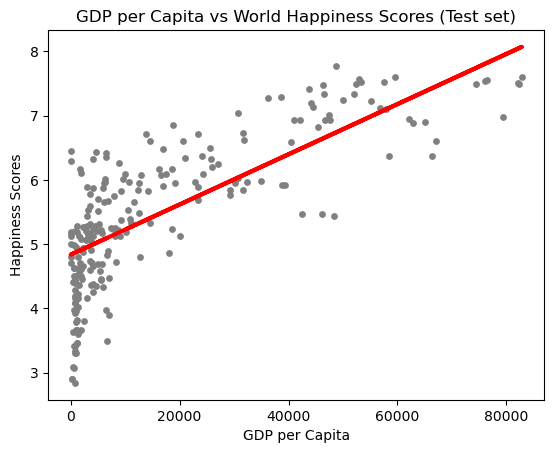

In [111]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

# Create a plot that shows the regression line from the model on the test set.

plot_test = matplotlib.pyplot
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per Capita vs World Happiness Scores (Test set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Happiness Scores') 
plot_test.show()

In [112]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.9050219e-05]]
Mean squared error:  0.5419385938410619
R2 score:  0.5876212137991951


In [113]:
y_predicted

array([[5.24597698],
       [7.28807668],
       [5.65137163],
       [7.0514097 ],
       [4.87112157],
       [5.05968691],
       [4.86762173],
       [4.94261929],
       [6.47541481],
       [5.32606142],
       [5.49674331],
       [5.26319538],
       [4.8662911 ],
       [4.99745774],
       [4.84611224],
       [5.97822029],
       [4.86588427],
       [4.99265348],
       [5.33141583],
       [4.95498717],
       [7.11797104],
       [4.86081538],
       [4.90008065],
       [5.84500721],
       [7.4505881 ],
       [6.98451053],
       [5.98035269],
       [7.16193163],
       [4.87758339],
       [6.65618212],
       [7.42243957],
       [6.72324227],
       [5.39182363],
       [4.85763218],
       [6.78996288],
       [5.0535512 ],
       [4.85146404],
       [5.18536472],
       [5.22452233],
       [5.55758423],
       [4.85751232],
       [6.10030221],
       [4.90491571],
       [5.26631742],
       [6.65254721],
       [6.34335102],
       [5.28530612],
       [4.953

In [114]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,5.245977
1,6.886,7.288077
2,6.344,5.651372
3,7.119,7.051410
4,3.781,4.871122
5,4.692,5.059687
6,4.390,4.867622
7,5.061,4.942619
8,6.929,6.475415
9,5.488,5.326061


### Comparing to training set

In [115]:
# Predict y values based on x predicted

y_predicted_train = regression.predict(X_train) 

In [116]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.9050219e-05]]
Mean squared error:  0.662360471885746
R2 score:  0.4694965640931894


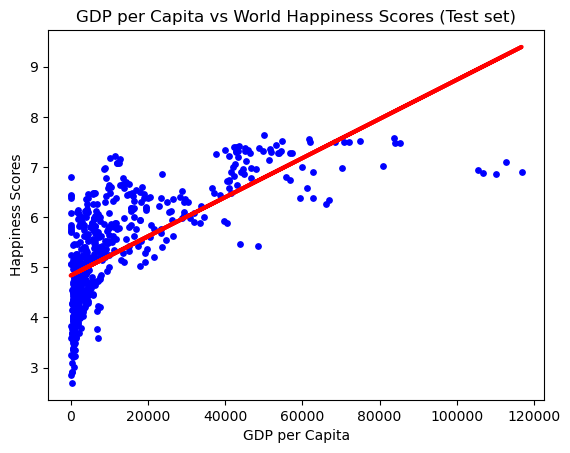

In [118]:
# Visualizing the training set results.

plot_test = matplotlib.pyplot
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP per Capita vs World Happiness Scores (Test set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Happiness Scores') 
plot_test.savefig('Linearregressionscatter_GDP_per_capita.png')

plot_test.show()

Train Data:
Slope: [[3.9050219e-05]]
Mean squared error:  0.5419385938410619
R2 score:  0.58762121379919

5125
Test :
a
Slope: [[3.9050219e-05]]
Mean squared error:  0.662360471885746
R2 score:  0.469496564093

Slope indicatemoderate, positiveweak correlation between GDP_per_capita and happiness score. MSE indicates a high variance between actual and predicted values and suggests possible concerns for overfitting in the training dataset. R2 values indicate that approximately 46% of the variance in happiness_score can be explained by the linear relationship with GDP_per_capita, giving a moderate level of explanatory power between variables.

Results from the initial anamoderatly ongly support the hypothesis that 'Higher GDP per capita is positively correlated with a higher happiness score.' The presence of high outliers may complicate the analysis and skew results. The analysis will be run again, but after removing high outliers to see if performance improves.1894ta

### Testing performance improvement after removing outliers

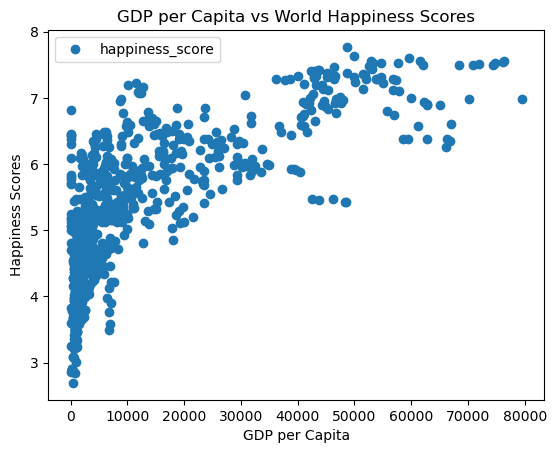

In [29]:
# Removing extreme values from the "GDP_per_capita" variable observed during the consistency checks.

df_test = df[df['GDP_per_capita'] <=80000] 

# See how the scatterplot looks without outliers.

df_test.plot(x = 'GDP_per_capita', y='happiness_score', style='o')  
matplotlib.pyplot.title('GDP per Capita vs World Happiness Scores')  
matplotlib.pyplot.xlabel('GDP per Capita')  
matplotlib.pyplot.ylabel('Happiness Scores')  
matplotlib.pyplot.show()

In [30]:
# Reshape again.

X_2 = df_test['GDP_per_capita'].values.reshape(-1,1)
y_2 = df_test['happiness_score'].values.reshape(-1,1)

In [31]:
# spilitting modified data into train and test sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [32]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [33]:
# Predicting y values based on x predicted values.

y_predicted_2 = regression.predict(X_test_2)

In [34]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.73874169e-05]]
Mean squared error:  0.5897324497872984
R2 score:  0.5310132425156725


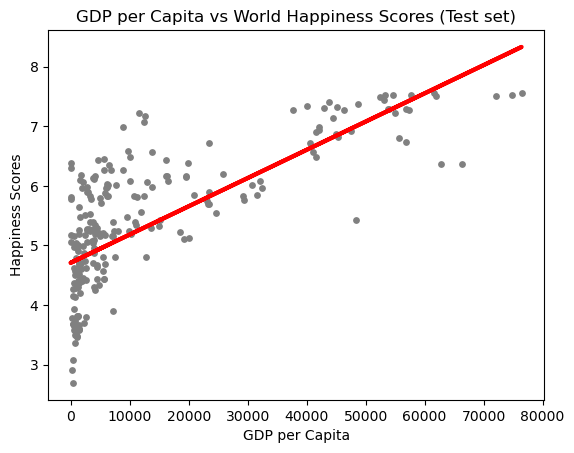

In [35]:
# Visualizing the test set results.
plot_test = matplotlib.pyplot
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('GDP per Capita vs World Happiness Scores (Test set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Happiness Scores') 
plot_test.show()

In [36]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,6.028,5.004327
1,4.419,4.779871
2,4.571,4.742104
3,6.983,5.125163
4,4.308,4.770004
5,4.786,4.754932
6,6.379,5.653399
7,5.247,5.057004
8,3.663,4.776328
9,6.084,5.181861


1. Higher GDP per capita is positively correlated with a higher happiness score.
  4
Testing Da after outliers were removed:tSlope: [[4.73874169e-05]]
Mean squared error:  0.5897324497872984
R2 score:  0.531013242515672
5

Both data sets indicate a positive correlation which can be observed in the scatterplots abov Removal of the extreme outliers does appear to improve the MSE and R2 scores. However, considering that around 12% of the dataset falls into the outlier category, removal of all outliers might adversely affect the analysis and learning model.

The next steps in the analysis will involve evaluating regional GDP values. The scatterplot above shows initial signs that analysizing data based on region may show furtehr connections given the clustering that can be oberserved between regions. . 6725

# 5.Export Data

In [104]:
#Export DF_all.csv clean data to “Prepared Data”
df.to_csv(os.path.join(path,'Data','Prepared Data', 'WHR_GDP_2015to2019.csv'), index=False)